#**Linear Regression -->** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Housedf = pd.read_csv("USA_Housing.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Housedf.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
Housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
Housedf.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
Housedf.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

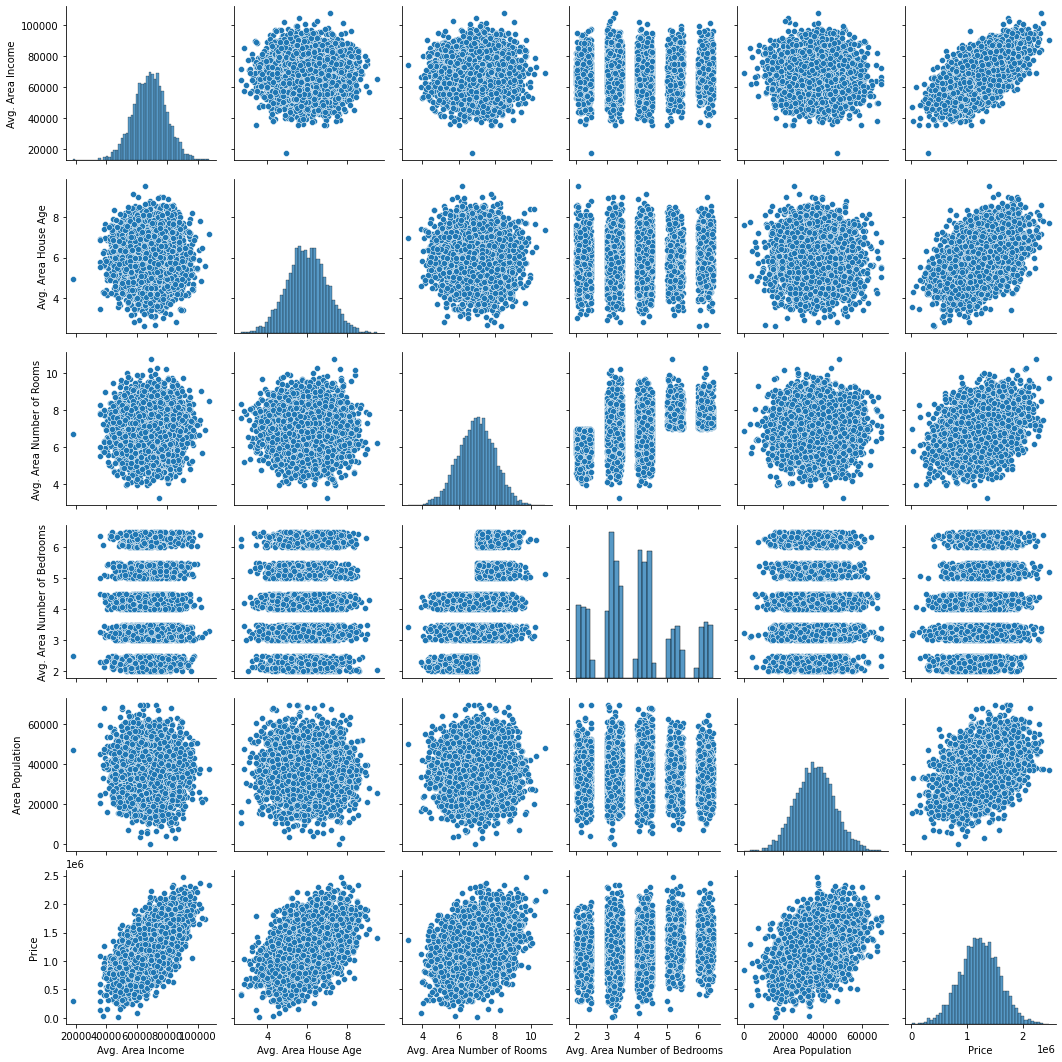

In [ ]:
sns.pairplot(Housedf)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


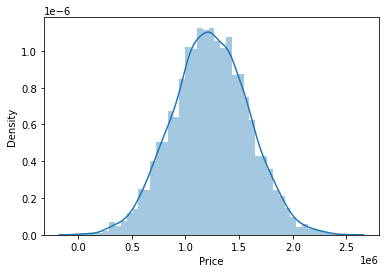

In [ ]:
sns.distplot(Housedf['Price'])

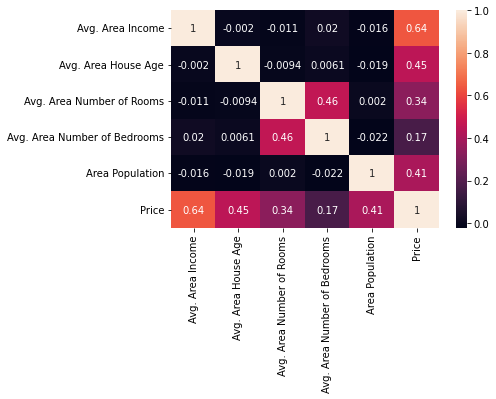

In [ ]:
sns.heatmap(Housedf.corr(),annot=True)

**Training and Testing Data -->**

In [ ]:
X = Housedf[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = Housedf['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

-2646115.7908026725


In [ ]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.572178
Avg. Area House Age,165410.684933
Avg. Area Number of Rooms,121194.704444
Avg. Area Number of Bedrooms,2698.594828
Area Population,15.280381


In [ ]:
y_pred = lr.predict(X_test)

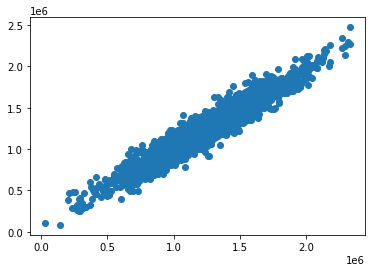

In [ ]:
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


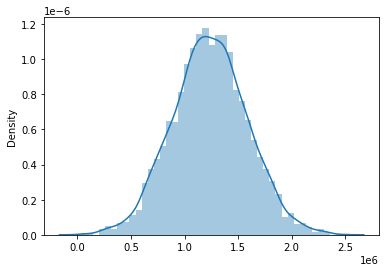

In [ ]:
sns.distplot((y_test,y_pred))

**Error Calculations -->**




In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 82846.55865610449
MSE: 10627724452.956316
RMSE: 103090.85533138386


#**KNN -->**

In [184]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [185]:
boss = pd.read_csv("/content/HousingData.csv")

In [186]:
boss.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.023,36.2


In [187]:
boss.shape

(506, 14)

In [188]:
boss.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
X = np.array(boss.iloc[:,0:13])
Y = np.array(boss['MEDV'])
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=5)

In [190]:
 from sklearn.neighbors import KNeighborsRegressor
 Nn = KNeighborsRegressor(3)
 Nn.fit(X_train,y_train)
 pred_Nn=Nn.predict(X_test)

Error for k(1) = 8.651988667048567
Error for k(2) = 7.714997356482135
Error for k(3) = 7.572807906625076
Error for k(4) = 7.596133885076012
Error for k(5) = 7.429386706997103
Error for k(6) = 7.703071698776484
Error for k(7) = 7.66242777514003
Error for k(8) = 7.587643472804632
Error for k(9) = 7.717076412481308
Error for k(10) = 7.757729083070366
Error for k(11) = 7.732540281715411
Error for k(12) = 7.798714035450021
Error for k(13) = 7.852507573676285
Error for k(14) = 7.89697424771447
Error for k(15) = 7.982352336899779
Error for k(16) = 8.028595615265097
Error for k(17) = 8.052943960925552
Error for k(18) = 8.103688662571882
Error for k(19) = 8.203088336670614
Error for k(20) = 8.255795781162659
Error for k(21) = 8.315592833271433
Error for k(22) = 8.337482209017866
Error for k(23) = 8.352867001846269
Error for k(24) = 8.413766816323927
Error for k(25) = 8.453579154790933
Error for k(26) = 8.472520569229307
Error for k(27) = 8.505896711148806
Error for k(28) = 8.525830320841157
Err

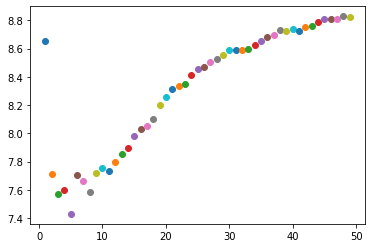

In [191]:
import sklearn
for i in range(1,50):
   model = KNeighborsRegressor(i)
   model.fit(X_train,y_train)
   pred_y=model.predict(X_test)
   mse = sklearn.metrics.mean_squared_error(y_test,pred_y,squared=False)
   print("Error for k({}) = {}".format(i,mse))
   plt.scatter(i,mse)
plt.show()

#**K-Means Clustering -->**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,52,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [ ]:
np.random.seed(200)
k=3
centroids ={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

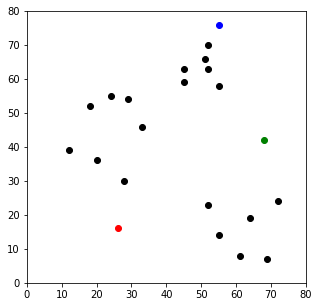

In [ ]:
fig= plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
labels=kmeans.predict(df)

In [ ]:
centroids =kmeans.cluster_centers_

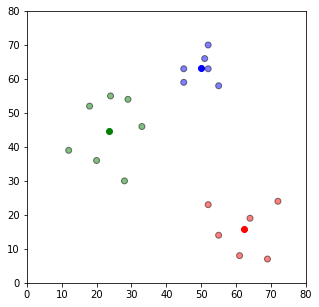

In [ ]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1],labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'],color = colors1,alpha=0.5,edgecolor='k')
for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

#**Naive_Bayes -->**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart = pd.read_csv("heart_1.csv")

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


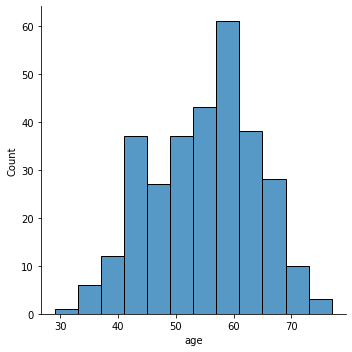

In [ ]:
sns.displot(heart['age'])
plt.show()

In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
heart['sex'].value_counts().keys

<bound method Series.keys of 1    207
0     96
Name: sex, dtype: int64>

In [ ]:
heart['sex'].value_counts().values

array([207,  96])

<BarContainer object of 2 artists>

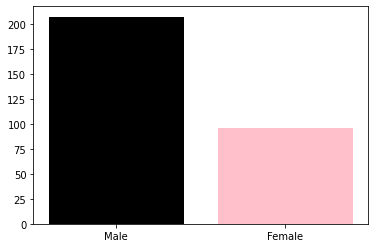

In [ ]:
plt.bar(list(("Male","Female")),list(heart['sex'].value_counts()),color=['black','pink'])

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<BarContainer object of 4 artists>

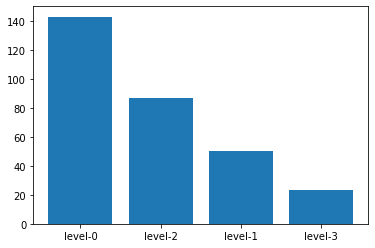

In [ ]:
plt.bar(list(('level-0','level-2','level-1','level-3')),list(heart['cp'].value_counts()))

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


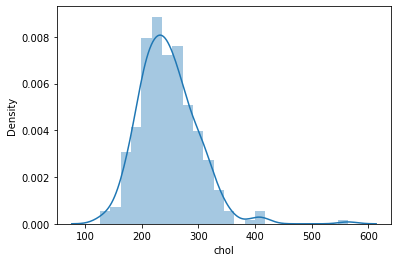

In [ ]:
sns.distplot(heart['chol'])
plt.show()

In [ ]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<BarContainer object of 2 artists>

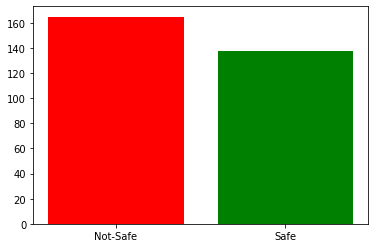

In [ ]:
plt.bar(list(("Not-Safe","Safe")),list(heart['target'].value_counts()),color=['red','green'])

In [ ]:
x=heart[['age']]
y=heart[['target']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_pred = mnb.predict(x_test)

In [ ]:
y_test.head(),y_pred[0:5]

(     target
 217       0
 134       1
 256       0
 164       1
 178       0, array([1, 1, 1, 1, 1]))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 0, 47],
       [ 0, 44]])

In [ ]:
accuracy=46/(45+46)
print(accuracy)

0.5054945054945055


In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x=heart[['age','trestbps','chol']]

In [ ]:
x.head()

,age,trestbps,chol
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354


In [ ]:
y = heart[['target']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[36, 17],
       [21, 48]])

In [ ]:
x = np.array(confusion_matrix(y_test,y_pred))
a= x[0][0]+x[1][1]/x[0][0]+x[0][1]+x[1][0]+x[1][1]
print("accuracy=",a)
print("error rate=",(1-a))
print("recall=",(x[0][0]/(x[0][0]+x[0][1])))
print("precision=",(x[0][0]/(x[0][0]+x[1][0])))

accuracy= 123.33333333333334
error rate= -122.33333333333334
recall= 0.6792452830188679
precision= 0.631578947368421


#**Logistic_Regression -->**

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
color=sns.color_palette()
import sklearn.metrics as metrics
#%matplotlib inline

In [ ]:
Default = pd.read_csv("/content/Default_Fin.csv")

In [ ]:
Default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
Default.shape

(10000, 5)

In [ ]:
Default.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


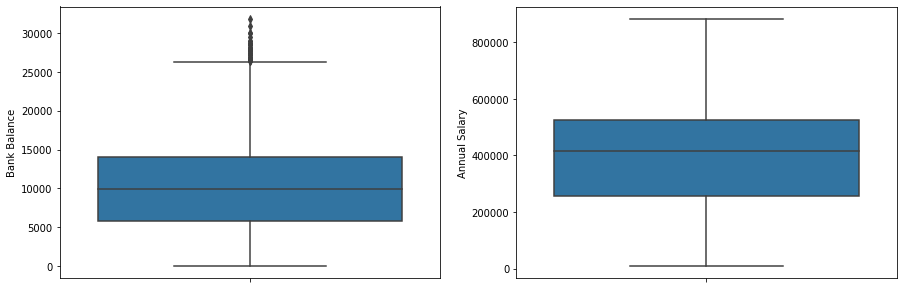

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default["Bank Balance"])
plt.subplot(1,2,2)
sns.boxplot(y=Default["Annual Salary"])
plt.show()

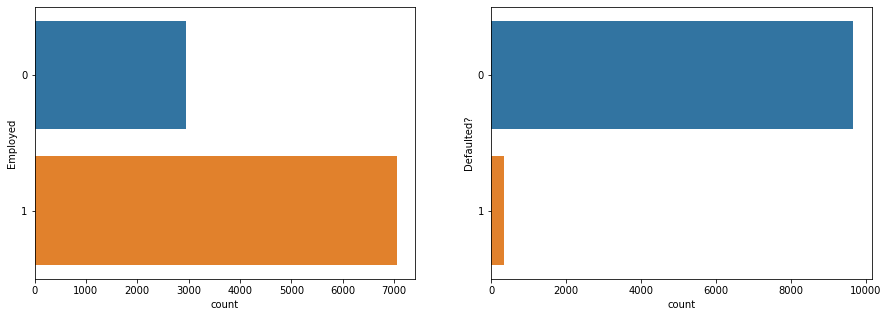

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=Default["Employed"])
plt.subplot(1,2,2)
sns.countplot(y=Default["Defaulted?"])
plt.show()

In [ ]:
Default["Employed"].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [ ]:
Default["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [ ]:
Default["Employed"].value_counts(normalize=True)

1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [ ]:
Default["Defaulted?"].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

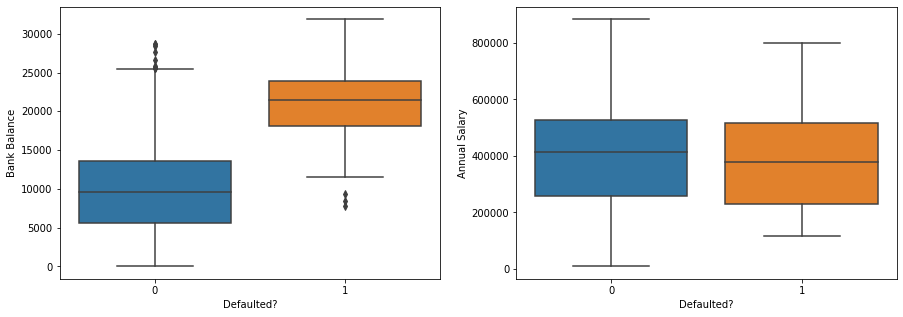

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default["Defaulted?"],Default["Bank Balance"])
plt.subplot(1,2,2)
sns.boxplot(Default["Defaulted?"],Default["Annual Salary"])
plt.show()

In [ ]:
pd.crosstab(Default["Employed"],Default["Defaulted?"],normalize="index").round(2)

Defaulted?,0,1
Employed,,
0,0.96,0.04
1,0.97,0.03


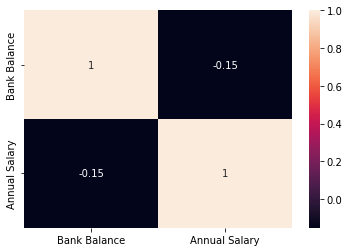

In [ ]:
sns.heatmap(Default[["Bank Balance","Annual Salary"]].corr(),annot=True)

In [ ]:
Default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [ ]:
Q1,Q3 =Default["Bank Balance"].quantile([.25,.75])
IQR =Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [ ]:
UL

26317.964999999997

In [ ]:
df = Default[Default["Bank Balance"]>UL]

In [ ]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
173,174,0,26469.60,171257.88,1
1136,1137,1,29988.24,618051.48,1
1160,1161,0,30032.16,179370.24,1
1359,1360,1,26651.64,488701.20,1
1502,1503,0,27994.56,141242.76,1
1609,1610,0,27239.40,216253.32,1
2096,2097,0,27142.20,240362.04,1
2140,2141,0,27706.68,229323.24,0
2929,2930,0,28647.72,339562.92,1
3162,3163,0,28983.84,209154.00,1


In [ ]:
df["Defaulted?"].count()

31

In [ ]:
df["Defaulted?"].value_counts(normalize=True)

1    0.83871
0    0.16129
Name: Defaulted?, dtype: float64

In [ ]:
df["Defaulted?"].value_counts()

1    26
0     5
Name: Defaulted?, dtype: int64

In [ ]:
Default["Bank Balance"] = np.where(Default["Bank Balance"]>UL,UL,Default["Bank Balance"])

In [ ]:
Default.head(20)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


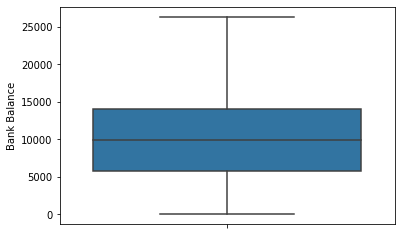

In [ ]:
sns.boxplot(y=Default["Bank Balance"])
plt.show()

In [ ]:
Default = pd.get_dummies(Default,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Default.drop('Defaulted?',axis=1).astype("int")
y = Default["Defaulted?"].astype("int")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7000, 4)
(3000, 4)


In [ ]:
print(y_train.value_counts(normalize=True).round(2))
print("")
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: Defaulted?, dtype: float64

0    0.97
1    0.03
Name: Defaulted?, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_test,y_test)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2905,    6],
       [  89,    0]])

In [ ]:
x = np.array(confusion_matrix(y_test,y_pred))
a= x[0][0]+x[1][1]/x[0][0]+x[0][1]+x[1][0]+x[1][1]
print("accuracy=",a)
print("error rate=",(1-a))
print("recall=",(x[0][0]/(x[0][0]+x[0][1])))
print("precision=",(x[0][0]/(x[0][0]+x[1][0])))

accuracy= 3000.0
error rate= -2999.0
recall= 0.9979388526279629
precision= 0.9702738810955244


#**CNN -->**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


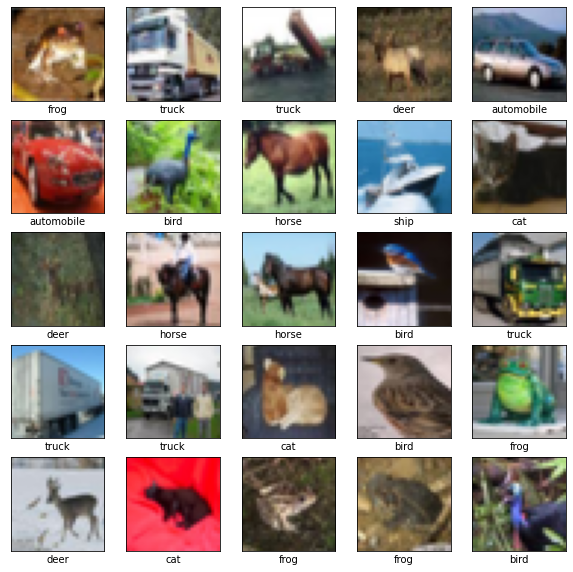

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)